<a href="https://colab.research.google.com/github/Lor3nzoVis3/DeepLearning_ProjectLV_GB/blob/master/FromScratch_OR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
@authors: LorenzoVisentini and Gianmarco Bolcato
"""

# Install keras adabound on Colab
# !pip install keras-adabound


modelName = "FromScratch"


#import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#keras
# import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.layers import BatchNormalization, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras import optimizers
from keras.preprocessing.image  import ImageDataGenerator
from keras.utils import plot_model
from keras_adabound import AdaBound

In [ ]:
# link with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Images parameters
img_width = 178 
img_height = 218
img_target_size = (img_height, img_width)
shape = (img_height, img_width, 3)

# Source Light
# Jupyter notebook paths
# train_dir = './orient/train'
# val_dir = './orient/val' 
# test_dir = './orient/test' 

# Google Colab paths
train_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/orient/train'
val_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/orient/val' 
test_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/orient/test' 

In [ ]:
n_classes = 3

# Hyperparameters
batch_size = 16
epochs = 15
conv_depth = 16
drop_rate = 0.7
lr = 0.005


# Set aug variable to save if the model used data augmentation or not
aug = False
if aug == True:
    modelName = modelName+'Aug'
    
    
# Give a model a unique name
file_model = modelName + 'SGD_ OR' + '_Bs' + str(batch_size) + '_Ep' + str(epochs) + '_Dr' + str(drop_rate) + '_ConvD' + str(conv_depth) +'_Lr' + str(lr)

In [ ]:
# Model
model = Sequential()

model.add(Conv2D(conv_depth, kernel_size = (3,3), activation= 'relu', input_shape = shape))
model.add(Conv2D(conv_depth, kernel_size = (3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(drop_rate//2))

model.add(Conv2D(conv_depth, kernel_size = (3,3), activation= 'relu'))
model.add(Conv2D(conv_depth, kernel_size = (3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(drop_rate//2))

model.add(Conv2D(conv_depth*2, kernel_size = (3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(conv_depth*2, kernel_size = (3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(drop_rate//2))

model.add(Conv2D(conv_depth*2, kernel_size = (5,5), activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(conv_depth*2, kernel_size = (5,5), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(drop_rate//2))

model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(drop_rate))

model.add(Dense(n_classes, activation= 'softmax'))

# custom optimizer
opt = optimizers.SGD(learning_rate=lr)
# AdaBound(lr=lr)


model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',  
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 216, 176, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 214, 174, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 214, 174, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 107, 87, 16)       0         
_________________________________________________________________
dropout (Dropout)            (None, 107, 87, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 105, 85, 16)       2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 103, 83, 16)       2

Folder Plots already exists


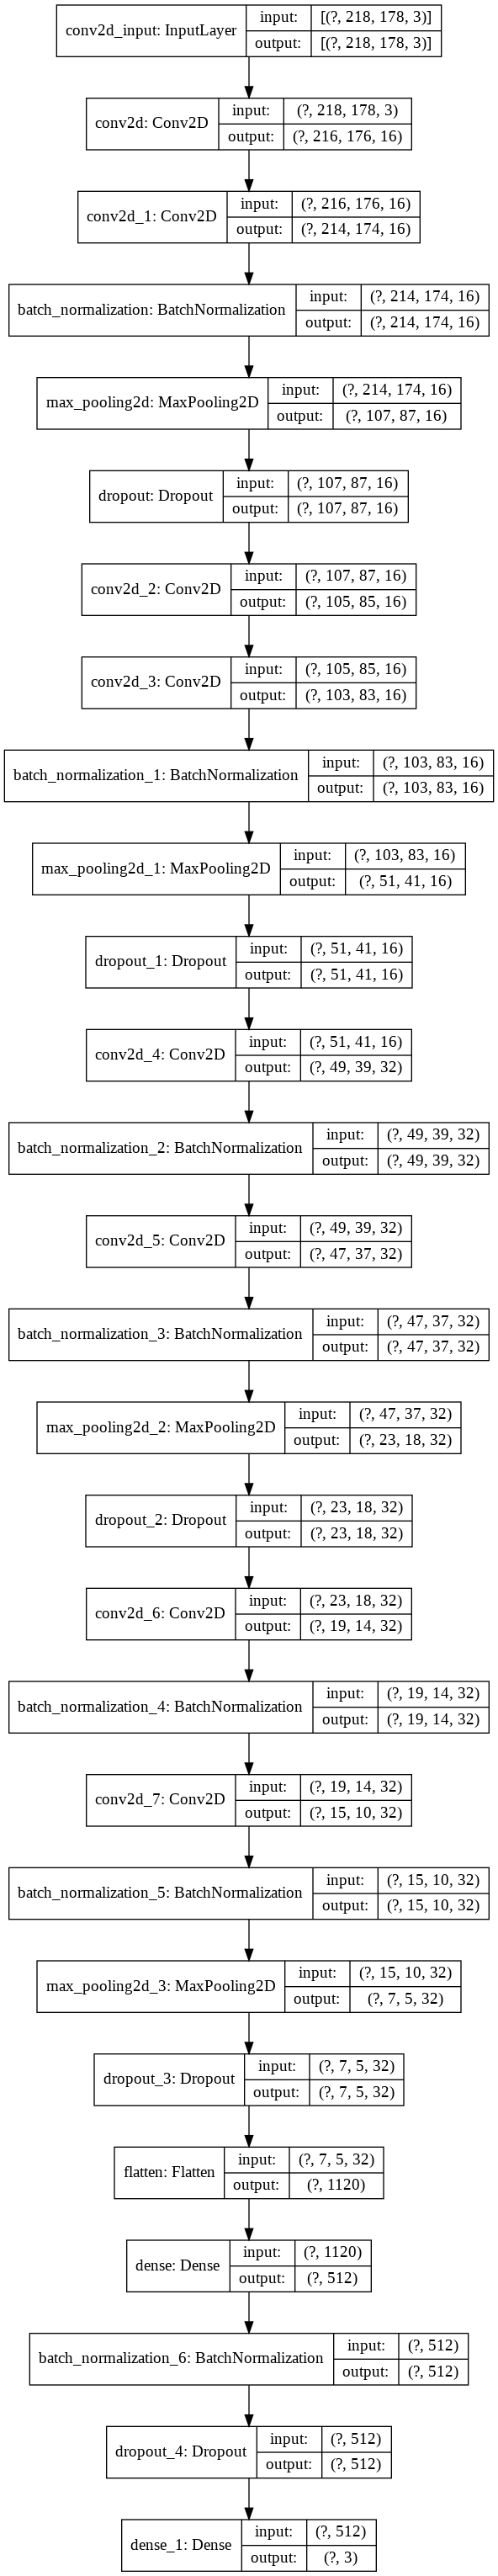

In [ ]:
# Plot model tree
# tree_path = './ModelTrees/'
tree_path = '/content/drive/My Drive/Deep Learning Project - Image Classification/ModelTrees' 

if os.path.exists(tree_path) == False:
    os.makedirs(tree_path)
else: 
    print('Folder Plots already exists')
plot_model(model, to_file=f"{tree_path}/{file_model}.png", show_layer_names=True, show_shapes=True)

In [ ]:
# Preprocessing

# Data augmentation
# train_gen = ImageDataGenerator(width_shift_range=[0,0.1],
#                             height_shift_range=[0,0.1],
#                             zoom_range=[0.85,1.0],
#                             fill_mode="nearest")

# Without
train_gen = ImageDataGenerator()

test_gen = ImageDataGenerator()


train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                    target_size=img_target_size,
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True,
                                                    seed=42
                                                    )

val_generator = test_gen.flow_from_directory(directory=val_dir,
                                                    target_size=img_target_size,
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True,
                                                    seed=42
                                                    )

test_generator = test_gen.flow_from_directory(directory = test_dir,
                                                    target_size = img_target_size,
                                                    color_mode="rgb",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle=True,
                                                    seed=42
                                                )

Found 7135 images belonging to 3 classes.
Found 1529 images belonging to 3 classes.
Found 1530 images belonging to 3 classes.


In [ ]:
# Training
history = model.fit_generator(generator = train_generator,
                             steps_per_epoch = train_generator.n//batch_size,
                             epochs = epochs,
                             validation_data = val_generator,
                             validation_steps=val_generator.n//batch_size
                             )

Epoch 1/15
445/445 [==============================] - 3465s 8s/step - loss: 1.1270 - accuracy: 0.6286 - val_loss: 0.5579 - val_accuracy: 0.7776
Epoch 2/15
445/445 [==============================] - 30s 68ms/step - loss: 0.5830 - accuracy: 0.7837 - val_loss: 0.6139 - val_accuracy: 0.7421
Epoch 3/15
445/445 [==============================] - 31s 69ms/step - loss: 0.4755 - accuracy: 0.8234 - val_loss: 0.3881 - val_accuracy: 0.8441
Epoch 4/15
445/445 [==============================] - 30s 67ms/step - loss: 0.4347 - accuracy: 0.8352 - val_loss: 0.4194 - val_accuracy: 0.8414
Epoch 5/15
445/445 [==============================] - 30s 67ms/step - loss: 0.4154 - accuracy: 0.8432 - val_loss: 0.3628 - val_accuracy: 0.8599
Epoch 6/15
445/445 [==============================] - 30s 67ms/step - loss: 0.3994 - accuracy: 0.8437 - val_loss: 0.3629 - val_accuracy: 0.8553
Epoch 7/15
445/445 [==============================] - 30s 67ms/step - loss: 0.3971 - accuracy: 0.8501 - val_loss: 0.3535 - val_accuracy:

In [ ]:
# consider highlight the different values of hyperparameters used
# OR orient o SL source light, Bs batch size, Ep epochs, Dr drop rate, Lr learning rate
# CHECK ALWAYS BOOLEAN PATCH VALUES (on top)

# Save model
# create models folder if doesn't exist
# path_models = './Models/'
path_models = '/content/drive/My Drive/Deep Learning Project - Image Classification/Models/' 

if os.path.exists(path_models) == False:
    os.makedirs(path_models)
else: 
    print('Folder Models already exists')

model.save(path_models + file_model + '.h5')
print(file_model)


# Save history
# create models folder if doesn't exist
# path_history = './History/'
path_history = '/content/drive/My Drive/Deep Learning Project - Image Classification/History/' 

if os.path.exists(path_history) == False:
    os.makedirs(path_history)
else: 
    print('Folder History already exists')
file_hist = path_history + file_model + '.csv'
df_history = pd.DataFrame(history.history)
with open(file_hist, 'w') as file:
    df_history.to_csv(file)
print(file_hist)

Folder Models already exists
FromScratchSGD_ OR_Bs16_Ep15_Dr0.7_ConvD16_Lr0.005
Folder History already exists
/content/drive/My Drive/Deep Learning Project - Image Classification/History/FromScratchSGD_ OR_Bs16_Ep15_Dr0.7_ConvD16_Lr0.005.csv


Folder Plots already exists


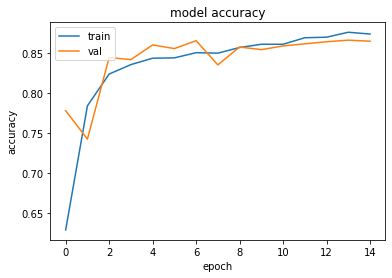

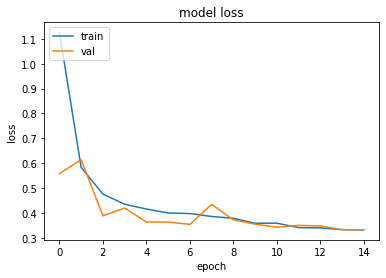

In [ ]:
# Plot path
# plot_path = './Plots/'
plot_path = '/content/drive/My Drive/Deep Learning Project - Image Classification/Plots/' 

if os.path.exists(plot_path) == False:
    os.makedirs(plot_path)
else: 
    print('Folder Plots already exists')
plot_file = file_model + '.jpg'


# plot results
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.savefig(plot_path + 'Accuracy' + plot_file)

plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.savefig(plot_path + 'Loss' + plot_file)

plt.show()

In [ ]:
# Predict
steps = test_generator.n // test_generator.batch_size
accuracy_ontest = model.evaluate_generator(test_generator, steps)
print(accuracy_ontest)

Instructions for updating:
Please use Model.evaluate, which supports generators.
[0.30926185846328735, 0.8809210658073425]
